###  Hi Everyone, 

This is the data analysis section of the traffic data to get the chances and the severity of the accident given various parameters like weather condition, road condition, light condition etc. 

In this section we take the entire data set and then prepare the final data set from it by removing the not so relevant columns and by taking care of the missing data. 

The dataframe for this data is 'df' and the data file is taken from the course material

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Infomration on DataSet

**TOTAL VARIABLES:** The initial data has 36 Predictor Variables and one Target Variable which is SEVERITY CODE The dataset contains data on accident which took place, severity (This column is coming twice in the data) of it and the values of various parameters at the time of accident.

The variables are in the format: Variable Name- Description (Type)

1.	SEVERITYCODE - A code that corresponds to the severity of the collision (Text, 100) - Can be one of (1,2)
2.	X - Coordinates(Double)
3.	Y - Coordinates(Double)
4.	OBJECTID - ESRI unique identifier (Int)
5.	INCKEY - A unique key for the incident (Int)
6.	COLDETKEY - Secondary key for the incident (Int)
7.	REPORTNO - Number of the report (Int)
8.	STATUS - One of (Matched, Unmatched) (Text)
9.	ADDRTYPE - Collision address type (Text, 12) - Can be one of (Alley, Block, Intersection)
10.	INTKEY - Key that corresponds to the intersection associated with a collision (Double)
11.	LOCATION - Description of the general location of the collision (Text, 255)
12.	EXCEPTRSNCODE - (Text , 10)
13.	EXCEPTRSNDESC - (Text , 300)
14.	SEVERITYCODE.1 - A code that corresponds to the severity of the collision (Text, 100) - Can be one of (1,2)
15.	SEVERITYDESC - A detailed description of the severity of the collision (Text)
16.	COLLISIONTYPE - Collision type (Text, 300)
17.	PERSONCOUNT - The total number of people involved in the collision (Double
18.	PEDCOUNT - The number of pedestrians involved in the collision. (Double
19.	PEDCYLCOUNT - The number of bicycles involved in the collision. (Double)
20.	VEHCOUNT - The number of vehicles involved in the collision. (Double)
21.	INCDATE - The date of the incident.(Date)
22.	INCDTTM - The date and time of the incident.(Text, 30)
23.	JUNCTIONTYPE - Category of junction at which collision took place (Text, 300)
24.	SDOT_COLCODE  - A code given to the collision by SDOT.(Text,10) 
25.	SDOT_COLDESC - A description of the collision corresponding to the collision code.(Text,300
26.	INATTENTIONIND - Whether or not collision was due to inattention.(Y/N)(Text, 1)
27.	UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol. (Text, 10)
28.	WEATHER - A description of the weather conditions during the time of the collision.(Text, 300
29.	ROADCOND - The condition of the road during the collision.(Text, 300)
30.	LIGHTCOND - The light conditions during the collision.(Text, 300)
31.	PEDROWNOTGRNT - Whether or not the pedestrian right of way was not granted. (Y/N) (Text, 1)
32.	SDOTCOLNUM - A number given to the collision by SDOT.(Text, 10
33.	SPEEDING - Whether or not speeding was a factor in the collision. (Y/N) (Text, 1)
34.	ST_COLCODE - A code provided by the state that describes the collision. (Text, 10)
35.	ST_COLDESC - A description that corresponds to the state’s coding designation.(Text 300)
36.	SEGLANEKEY - A key for the lane segment in which the collision occurred.(Long)
37.	CROSSWALKKEY - A key for the crosswalk at which the collision occurred.(Long)
38.	HITPARKEDCAR - Whether or not the collision involved hitting a parked car. (Y/N) (Text, 1)  

In [3]:
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [4]:
df.shape

(194673, 38)

In [67]:
dfnew = df

As we can see from the data that some of the columns are not required for the analysis of data. 
So we try to analyze these columns and will delete them if they are not relevant

 - Remove columsn which are just IDs, Numbers and Keys, so we can remove them - OBJECTID, INCKEY, INTKEY, COLDETKEY, REPORTNO, STATUS, SEGLANEKEY, CROSSWALKKEY 
 - Remove columsn which are infomation given - ST_COLCODE, SDOT_COLDESC, SDOT_COLCODE, ST_COLDESC, SDOTCOLNUM
 - Remove column SEVERITYCODE.1  as it is the duplication of the first column SEVERITYCODE
 - Remove column  SEVERITYDESC - It is just a detailed description of the severity of the collision
 - Remove columns EXCEPTRSNCODE and EXCEPTRSNDESC as not enough information is given in the columns 
 - Other columns to be removed are -  PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT as this data changes on a continous basis and we can not predict that at the time of collision how many vehicles or persons will be there
 - Remove column - X, Y, LOCATION as this is most probably differnt for every collision  
 - Other columns which are not relevnant where the information available is less than 15% - PEDROWNOTGRNT, SPEEDING, INATTENTIONIND 
 - For column - **HITPARKEDCAR** the count of 'N':'Y' is (187,457:7,216) thus this is very unbalance parameter and should be removed 

In [68]:
dfnew = dfnew.drop(['OBJECTID', 'INCKEY', 'INTKEY','COLDETKEY', 'REPORTNO', 'STATUS', 'SEGLANEKEY', 'CROSSWALKKEY'], axis = 1)
dfnew = dfnew.drop(['ST_COLCODE', 'SDOT_COLDESC', 'SDOT_COLCODE', 'ST_COLDESC', 'SDOTCOLNUM'], axis = 1) 
dfnew = dfnew.drop(['SEVERITYCODE.1','SEVERITYDESC','EXCEPTRSNCODE','EXCEPTRSNDESC'], axis = 1) 
dfnew = dfnew.drop(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'], axis = 1) 
dfnew = dfnew.drop(['X', 'Y', 'LOCATION'], axis = 1) 
dfnew = dfnew.drop(['PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND'], axis = 1) 
dfnew = dfnew.drop(['HITPARKEDCAR'], axis = 1) 


In [69]:
dfnew.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')

#### Convert columns 'INCDATE' and 'INCDTTM' to date time object

In [70]:
dfnew['INCDATE'] = pd.to_datetime(df['INCDATE'])
dfnew['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [71]:
dfnew.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
3,1,Block,Other,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
4,2,Intersection,Angles,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),0,Raining,Wet,Daylight


#### We can see that column **INCDATE** provide the same information as column **INCDTTM**, we should remove this column

In [72]:
dfnew = dfnew.drop(['INCDATE'], axis = 1) 

In [73]:
dfnew.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2013-03-27 14:54:00,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2006-12-20 18:55:00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,2004-11-18 10:20:00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
3,1,Block,Other,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
4,2,Intersection,Angles,2004-01-28 08:04:00,At Intersection (intersection related),0,Raining,Wet,Daylight


In [74]:
df['WEATHER'].value_counts()/df['WEATHER'].count()

Clear                       0.586180
Raining                     0.174823
Overcast                    0.146177
Unknown                     0.079597
Snowing                     0.004784
Other                       0.004388
Fog/Smog/Smoke              0.003001
Sleet/Hail/Freezing Rain    0.000596
Blowing Sand/Dirt           0.000295
Severe Crosswind            0.000132
Partly Cloudy               0.000026
Name: WEATHER, dtype: float64

In [75]:
df['ROADCOND'].value_counts()/df['ROADCOND'].count()

Dry               0.656487
Wet               0.250310
Unknown           0.079500
Ice               0.006375
Snow/Slush        0.005294
Other             0.000696
Standing Water    0.000606
Sand/Mud/Dirt     0.000395
Oil               0.000337
Name: ROADCOND, dtype: float64

In [76]:
df['LIGHTCOND'].value_counts()/df['LIGHTCOND'].count()

Daylight                    0.612850
Dark - Street Lights On     0.255970
Unknown                     0.071096
Dusk                        0.031145
Dawn                        0.013203
Dark - No Street Lights     0.008111
Dark - Street Lights Off    0.006327
Other                       0.001240
Dark - Unknown Lighting     0.000058
Name: LIGHTCOND, dtype: float64

**Weather Column**: 
Four values 'Clear', 'Raining','Overcast', 'Unknown' make **99%** of total data

**Road  Condition  Column**: 
Three values 'Wet', 'Dry','Unknown', make **98.5%** of total data

**Light  Condition  Column**: 
Four values 'DayLight', 'Dark','Unknown','Dusk' make **98%** of total data


**Unknown** is 8% of total 'Weather' data - Lets check what are the values of Road condition and Light condition when value of Weather is 'Unknown'

In [77]:
dfnew[dfnew['WEATHER']== 'Unknown'][['ROADCOND','LIGHTCOND']].describe()

,ROADCOND,LIGHTCOND
count,15080,15046
unique,9,8
top,Unknown,Unknown
freq,13611,10709


We analysed that in the above column that when value of 'WEATHER' is 'Unknown':
 - 90% of times value of 'ROADCOND' is 'Unknown'
 - 70% of times value of 'LIGHTCOND' is 'Unknown'
 
###### ** So we can remove all the rows for which values for '**WEATHER**' are '**Unknown**' as for most of these cases values in 'ROADCOND' and 'LIGHTCOND' will be '**Unknown**'

Also we can get dummy variables for these columns as: 

**Weather Column:** 'Clear', 'Raining','Overcast' \
**Road Condition Column:** 'Wet', 'Dry' \
**Light Condition Column:** DayLight', 'Dark'

In [78]:
dfnew = dfnew[(dfnew['WEATHER']== 'Clear') | (dfnew['WEATHER']==  'Raining') | (dfnew['WEATHER']== 'Overcast')]
dfnew = dfnew[(dfnew['ROADCOND'] == 'Wet') | (dfnew['ROADCOND'] == 'Dry')]
dfnew = dfnew[(dfnew['LIGHTCOND'] == 'Daylight') | (dfnew['LIGHTCOND'] == 'Dark - Street Lights On')]
NewShape = dfnew.shape
print("Dataframe Shape after removing non relevant rows; ",NewShape)
dfnew.head(2)

Dataframe Shape after removing non relevant rows;  (156713, 9)


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2013-03-27 14:54:00,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2006-12-20 18:55:00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On


In [79]:
dfnew['ADDRTYPE'].value_counts()

Block           98565
Intersection    57020
Alley             501
Name: ADDRTYPE, dtype: int64

###### There will be two dummy variables for 'ADDRTYPE' - 'Block', 'Intersection' and we should remove the rows with value 'Alley'

In [80]:
dfnew = dfnew[(dfnew['ADDRTYPE'] == 'Block') | (dfnew['ADDRTYPE'] == 'Intersection')]
NewShape1 = dfnew.shape
print("Dataframe Shape after removing non relevant rows; ",NewShape1)

Dataframe Shape after removing non relevant rows;  (155585, 9)


In [81]:
dfnew['COLLISIONTYPE'].value_counts()

Angles        31433
Rear Ended    30330
Parked Car    30163
Other         19788
Sideswipe     16406
Left Turn     12479
Pedestrian     5790
Cycles         4824
Right Turn     2651
Head On        1708
Name: COLLISIONTYPE, dtype: int64

###### As we can see the data is fairly distributed among the 10 values of column - '**COLLISIONTYPE**' - we should delete this column

In [82]:
dfnew = dfnew.drop(['COLLISIONTYPE'], axis = 1) 

In [83]:
dfnew['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              68289
At Intersection (intersection related)               55257
Mid-Block (but intersection related)                 19613
Driveway Junction                                     9241
At Intersection (but not related to intersection)     1670
Ramp Junction                                          136
Unknown                                                  3
Name: JUNCTIONTYPE, dtype: int64

###### We can remove the column 'JUNCTIONTYPE' as it is fairly distributed with lot of values and it is given detail information of what is given in column 'ADDRTYPE'

In [84]:
dfnew = dfnew.drop(['JUNCTIONTYPE'], axis = 1) 

In [85]:
dfnew.shape

(155585, 7)

### Now we will convert the categorical values in numeric value by using ONE HOT ENCODING

In [86]:
# Lets call all the columns we going to use for final prediction as Feature
Feature = dfnew[['INCDTTM', 'UNDERINFL']]
Feature.head()

,INCDTTM,UNDERINFL
0,2013-03-27 14:54:00,N
1,2006-12-20 18:55:00,0
2,2004-11-18 10:20:00,0
3,2013-03-29 09:26:00,N
4,2004-01-28 08:04:00,0


In [87]:
Feature = pd.concat([Feature,pd.get_dummies(dfnew['ADDRTYPE']), pd.get_dummies(dfnew['WEATHER']), pd.get_dummies(dfnew['ROADCOND']),pd.get_dummies(dfnew['LIGHTCOND'])], axis=1)
print(Feature.columns)
Feature.head()

Index(['INCDTTM', 'UNDERINFL', 'Block', 'Intersection', 'Clear', 'Overcast',
       'Raining', 'Dry', 'Wet', 'Dark - Street Lights On', 'Daylight'],
      dtype='object')


,INCDTTM,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark - Street Lights On,Daylight
0,2013-03-27 14:54:00,N,0,1,0,1,0,0,1,0,1
1,2006-12-20 18:55:00,0,1,0,0,0,1,0,1,1,0
2,2004-11-18 10:20:00,0,1,0,0,1,0,1,0,0,1
3,2013-03-29 09:26:00,N,1,0,1,0,0,1,0,0,1
4,2004-01-28 08:04:00,0,0,1,0,0,1,0,1,0,1


In [26]:
Feature.rename(columns={"Dark - Street Lights On": "Dark"}, inplace = True)
Feature.shape
Feature.head()

,INCDTTM,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight
0,2013-03-27 14:54:00,N,0,1,0,1,0,0,1,0,1
1,2006-12-20 18:55:00,0,1,0,0,0,1,0,1,1,0
2,2004-11-18 10:20:00,0,1,0,0,1,0,1,0,0,1
3,2013-03-29 09:26:00,N,1,0,1,0,0,1,0,0,1
4,2004-01-28 08:04:00,0,0,1,0,0,1,0,1,0,1


## In the below section I am trying to see how the Month or Hour of the time is affection the severity of Accident

In [27]:
Feature['Month'] = Feature['INCDTTM'].dt.month
Feature['Hour'] = Feature['INCDTTM'].dt.hour

Feature = Feature.drop(['INCDTTM'], axis =1)
Feature.head()

,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Month,Hour
0,N,0,1,0,1,0,0,1,0,1,3,14
1,0,1,0,0,0,1,0,1,1,0,12,18
2,0,1,0,0,1,0,1,0,0,1,11,10
3,N,1,0,1,0,0,1,0,0,1,3,9
4,0,0,1,0,0,1,0,1,0,1,1,8


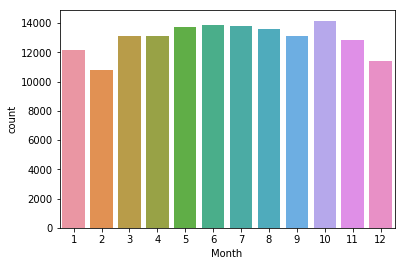

In [28]:
sns.countplot(x= 'Month', data = Feature)

#### As Column 'Month' is almost equally distributed, I will remove column 'Month'

In [29]:
Feature = Feature.drop(['Month'], axis =1)
Feature.head()

,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Hour
0,N,0,1,0,1,0,0,1,0,1,14
1,0,1,0,0,0,1,0,1,1,0,18
2,0,1,0,0,1,0,1,0,0,1,10
3,N,1,0,1,0,0,1,0,0,1,9
4,0,0,1,0,0,1,0,1,0,1,8


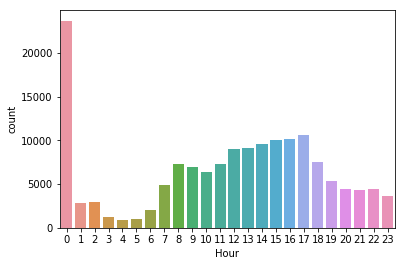

In [30]:
sns.countplot(x= 'Hour', data = Feature)

#### For Column 'Hour' I will divide in three equal parts - 0 to 7, 8 to 15, 16 to 23

In [31]:
Feature['Hour(0-7)'] = Feature['Hour']
Feature.head()     

,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Hour,Hour(0-7)
0,N,0,1,0,1,0,0,1,0,1,14,14
1,0,1,0,0,0,1,0,1,1,0,18,18
2,0,1,0,0,1,0,1,0,0,1,10,10
3,N,1,0,1,0,0,1,0,0,1,9,9
4,0,0,1,0,0,1,0,1,0,1,8,8


In [32]:
Feature['Hour(0-7)']= Feature['Hour'].apply(lambda x: 1 if (x<7)  else 0)
Feature['Hour(16-23)']= Feature['Hour'].apply(lambda x: 1 if (x>15)  else 0)

In [33]:
Feature.head(10)           

,UNDERINFL,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Hour,Hour(0-7),Hour(16-23)
0,N,0,1,0,1,0,0,1,0,1,14,0,0
1,0,1,0,0,0,1,0,1,1,0,18,0,1
2,0,1,0,0,1,0,1,0,0,1,10,0,0
3,N,1,0,1,0,0,1,0,0,1,9,0,0
4,0,0,1,0,0,1,0,1,0,1,8,0,0
5,N,0,1,1,0,0,1,0,0,1,17,0,1
6,0,0,1,0,0,1,0,1,0,1,0,1,0
7,N,0,1,1,0,0,1,0,0,1,17,0,1
8,0,1,0,1,0,0,1,0,0,1,13,0,0
9,0,0,1,1,0,0,1,0,0,1,15,0,0


In [34]:
Feature['UNDERINFL'].value_counts()

N    82412
0    64984
Y     4568
1     3621
Name: UNDERINFL, dtype: int64

#### Lastly for column 'UNDERINFL' 95% of values are either 'N' or '0' and as no information is there about the meaning of parameter with value '0', I am removing this column

In [35]:
Feature = Feature.drop(['UNDERINFL'], axis =1)
Feature.head()

,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Hour,Hour(0-7),Hour(16-23)
0,0,1,0,1,0,0,1,0,1,14,0,0
1,1,0,0,0,1,0,1,1,0,18,0,1
2,1,0,0,1,0,1,0,0,1,10,0,0
3,1,0,1,0,0,1,0,0,1,9,0,0
4,0,1,0,0,1,0,1,0,1,8,0,0


### Feature selection
###### Lets defind feature sets, X:

In [36]:
X = Feature
print(X.shape)
X[0:5]

(155585, 12)


,Block,Intersection,Clear,Overcast,Raining,Dry,Wet,Dark,Daylight,Hour,Hour(0-7),Hour(16-23)
0,0,1,0,1,0,0,1,0,1,14,0,0
1,1,0,0,0,1,0,1,1,0,18,0,1
2,1,0,0,1,0,1,0,0,1,10,0,0
3,1,0,1,0,0,1,0,0,1,9,0,0
4,0,1,0,0,1,0,1,0,1,8,0,0


### Target Value as y

In [37]:
y = dfnew['SEVERITYCODE'].values
print(y.shape)
y[0:5]

(155585,)


array([2, 1, 1, 1, 2])

### Normalize Data
###### Data Standardization give data zero mean and unit variance

In [38]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-1.31476386,  1.31476386, -1.37462903,  2.32817035, -0.48481608,
        -1.64697814,  1.64697814, -0.63908502,  0.63908502,  0.37193303,
        -0.53479634, -0.69189592],
       [ 0.76059286, -0.76059286, -1.37462903, -0.42952183,  2.06263784,
        -1.64697814,  1.64697814,  1.56473703, -1.56473703,  0.95862513,
        -0.53479634,  1.44530408],
       [ 0.76059286, -0.76059286, -1.37462903,  2.32817035, -0.48481608,
         0.6071726 , -0.6071726 , -0.63908502,  0.63908502, -0.21475906,
        -0.53479634, -0.69189592],
       [ 0.76059286, -0.76059286,  0.727469  , -0.42952183, -0.48481608,
         0.6071726 , -0.6071726 , -0.63908502,  0.63908502, -0.36143208,
        -0.53479634, -0.69189592],
       [-1.31476386,  1.31476386, -1.37462903, -0.42952183,  2.06263784,
        -1.64697814,  1.64697814, -0.63908502,  0.63908502, -0.5081051 ,
        -0.53479634, -0.69189592]])

### Classification:

### 1. K Nearest Neighbor(KNN)

In [39]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (108909, 12) (108909,)
Test set: (46676, 12) (46676,)


In [40]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Best k
from sklearn import metrics
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
        
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6462207558488302 with k= 8


In [42]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# Building the model again, using k=7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)

print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.65
KNN F1-score: 0.58


### 2. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test,DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.67
DT F1-score: 0.54


### 3. Support Vector Machine (SVM)


In [45]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVM_yhat = SVM_model.predict(X_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted'))

SVM Jaccard index: 0.67
SVM F1-score: 0.54


### 4. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
 
LR_yhat = LR_model.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.67
LR F1-score: 0.54
LR LogLoss: 0.62


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
